In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving MobilePriceRange.csv to MobilePriceRange.csv


In [ ]:
import pandas as pd

df = pd.read_csv('MobilePriceRange.csv')
df.head()

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,High
3,615,10,2.5,6,2769,11,0,1,0,0,...,0.8,131,0,16,8,0,9,1216,1786,High
4,1821,44,1.2,2,1411,15,0,1,1,0,...,0.6,141,1,8,2,13,14,1208,1212,Medium


In [ ]:
print("Shape:", df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

df.describe().T


In [ ]:
# --- Q2: Exploratory Data Analysis ---
# 1. Analyze the target variable 'PriceRange'
print("\n--- Target Variable Distribution ---")
# Check if 'PriceRange' column exists
if 'PriceRange' in df.columns:
    print(df['PriceRange'].value_counts())

    # Plot the distribution of PriceRange
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='PriceRange', order=['Low', 'Medium', 'High', 'Very High'])
    plt.title('Distribution of Price Range Categories')
    plt.xlabel('Price Range')
    plt.ylabel('Count')
    plt.show()

    # 2. Correlation Heatmap
    df_eda = df.copy()

    # Use the correct mapping based on observed values
    if 'Very High' in df['PriceRange'].unique():
         price_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
    else:
         price_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'VeryHigh': 3}

    df_eda['PriceRange_encoded'] = df_eda['PriceRange'].map(price_mapping)

    # Calculate the correlation matrix
    corr_matrix = df_eda.corr(numeric_only=True)

    # Plot the heatmap
    plt.figure(figsize=(18, 14))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
    plt.title('Correlation Heatmap of Mobile Features')
    plt.tight_layout()
    plt.show()

    # 3. Box plot: RAM vs. PriceRange
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x='PriceRange', y='RAM', order=['Low', 'Medium', 'High', 'Very High'])
    plt.title('RAM vs. Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('RAM (in MB)')
    plt.show()

# 4. Box plot: BatteryPower vs. PriceRange
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x='PriceRange', y='BatteryPower', order=['Low', 'Medium', 'High', 'Very High'])
    plt.title('Battery Power vs. Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Battery Power')
    plt.show()

    # 5. Scatter plot: PxHeight vs. PxWeight
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df, x='PxHeight', y='PxWeight', hue='PriceRange', palette='coolwarm', hue_order=['Low', 'Medium', 'High', 'Very High'])
    plt.title('Pixel Height vs. Pixel Weight by Price Range')
    plt.xlabel('Pixel Height')
    plt.ylabel('Pixel Weight')
    plt.show()

else:
    print("Error: 'PriceRange' column not found in the DataFrame.")

Optimal k: 9
Accuracy at optimal k: 0.7975


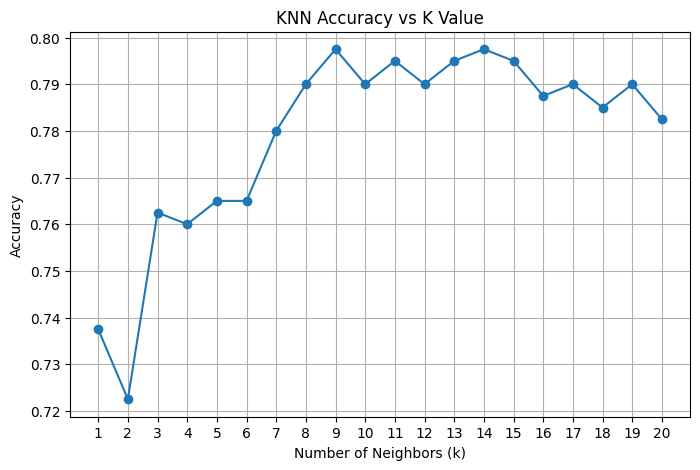

In [ ]:
# Q3 K-Nearest Neighbors (KNN) Classification Model
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt   # <-- Added for graph

# Select two suitable numeric features and the target variable
X = df[['RAM', 'BatteryPower']]
y = df['PriceRange']

# Scale the input features to ensure fair distance calculations
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Dictionary to store accuracy scores for each value of k
scores = {}

# Train and evaluate KNN models for k values from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
# Find the k value that gives the highest accuracy
optimal_k = max(scores, key=scores.get)

# Print the optimal k value and its accuracy
print("Optimal k:", optimal_k)
print("Accuracy at optimal k:", scores[optimal_k])



ks = list(scores.keys())
acc_values = list(scores.values())

plt.figure(figsize=(8, 5))
plt.plot(ks, acc_values, marker='o')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(ks)
plt.grid(True)
plt.show()


In [ ]:
#Q4 Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# we Used the same scaled features and data split from Q3
# (X_train, X_test, y_train, y_test already exist)

# Created and trained a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicted using the test set
dt_predictions = dt_model.predict(X_test)

# Calculated accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7475


In [ ]:
# Q5 — Hyperparameter Tuning for Decision Tree

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Recreate scaled features (in case runtime was reset)
X = df[['RAM', 'BatteryPower']]
y = df['PriceRange']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_
tuned_predictions = best_dt_model.predict(X_test)

tuned_accuracy = accuracy_score(y_test, tuned_predictions)

print("Best Hyperparameters:", grid_search.best_params_)
print("Tuned Decision Tree Accuracy:", tuned_accuracy)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.79


#Question 6
**KNN Classifier (k = 9)**

**Accuracy: 0.7975**

***The confusion matrix for the KNN model shows***:

The largest values are placed along the main diagonal, meaning KNN correctly predicted the majority of instances in each price category.

The number of misclassified samples is relatively low compared to the other models.

Only a small proportion of predictions fall into the off-diagonal cells, indicating fewer errors.

**Interpretation**:
The KNN model demonstrates the strongest predictive performance among the three models. Its high diagonal values reflect its ability to distinguish between the different price ranges effectively, suggesting that RAM and BatteryPower are good predictors when distance-based methods are used.

Decision Tree (Default Parameters)

Accuracy: 0.7475

The confusion matrix for the default Decision Tree shows :

Correct predictions are still visible along the diagonal, but significantly fewer compared to KNN.

More off-diagonal entries appear, representing a larger number of misclassifications.

The model shows inconsistency in separating some classes, indicating that it may be overfitting or underfitting with the default settings.

Interpretation:
This model produced the weakest performance of the three. The confusion matrix shows more mislabelled cases, meaning the Decision Tree struggled to form accurate decision boundaries using only RAM and BatteryPower. This suggests the default model is not optimally tuned for this dataset.

Tuned Decision Tree (GridSearchCV Optimised)

Accuracy: 0.79

The tuned Decision Tree used optimized hyperparameters (max_depth = 5, min_samples_leaf = 2, min_samples_split = 2).
Its confusion matrix shows:

A noticeable improvement compared to the default Decision Tree, with more correct predictions along the diagonal.

Fewer misclassifications, meaning the tuning improved the model’s generalization and reduced overfitting.

Its diagonal strength is very close to that of the KNN model.

Interpretation:
The tuned Decision Tree performs nearly as well as KNN. It strikes a balance between model depth and leaf sizes, allowing it to classify most instances correctly while avoiding unnecessary complexity. Although slightly below KNN in accuracy, the tuned model shows significantly better performance than the default decision tree.

Therefore,KNN (k=9) achieved the best overall performance.